# Workshop #5: Probability Distributions

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import scipy.stats as stats
import random

## Problem 1
A certain tennis player makes a successful first serve 70% of the time. Assume that each serve is independent of the others. If she serves 6 times, what is the probability she gets:
* all 6 serves in? (a)
* exactly 4 serves in? (b)
* at least 4 serves in? (c)
* no more than 4 serves in? (d)
* Make a bar graph to visualize the distribution

P(a) = 0.1128
P(b) = 0.328
P(c) = 0.7446
P(d) = 0.5834


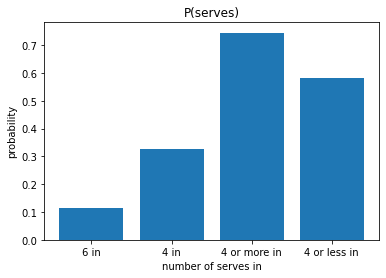

In [2]:
n = 5000 # simulations

all_6_in = np.zeros(n) 
exactly_4_in = np.zeros(n)
at_least_4_in = np.zeros(n)
no_more_than_4_in = np.zeros(n)

for i in range(n):
    
    serves = 6
    ins = 0
    
    for j in range(serves):
        successful_serve = np.random.random()
        if successful_serve <= 0.7: # the serve is successful
            ins += 1
    
    if ins == 6:
        all_6_in[i] = 1
    
    if ins == 4:
        exactly_4_in[i] = 1
        
    if ins >= 4:
        at_least_4_in[i] = 1
        
    if ins <= 4:
        no_more_than_4_in[i] = 1
        

prob_serves = [sum(all_6_in)/n, sum(exactly_4_in)/n, sum(at_least_4_in)/n, sum(no_more_than_4_in)/n]

print('P(a) =', prob_serves[0]) 
print('P(b) =', prob_serves[1])
print('P(c) =', prob_serves[2])
print('P(d) =', prob_serves[3])

plt.figure()
plt.bar(x = ['6 in', '4 in', '4 or more in', '4 or less in'], height = [prob_serves[0], prob_serves[1], prob_serves[2], prob_serves[3]])
plt.title('P(serves)')
plt.xlabel('number of serves in')
plt.ylabel('probability')
plt.show()

## Problem 2
A company produces computer microchips, which have a life expectancy that follows a **normal distribution** with a **mean of 90 months** and a **standard deviation of 3.7 months**.
* If a microchip is guaranteed to work for 84 months, find the probability that it will fail before the guarantee period ends.
* The probability that a microchip is working before the end of the guarantee period is required to be 99%. For how many months should it be guaranteed to work?
* A rival company produces microchips where the probability that they will fail after 84 months is 0.88. Given that the life expectancy also follows a normal distribution with standard deviation 3.7 months, find the mean life expectancy of these chips.

In [3]:
mu = 90
sigma = 3.7

X = stats.norm(mu, sigma)  #fill in the gaps

print('\nP(X <= 84) = ', X.cdf(84))

print('P(X < g) = 0.01 for g = ', X.ppf(1-0.99))

#for the solver part:
Z = stats.norm(0, 1)
z, mu = sp.symbols('z mu', real=True)
z = Z.ppf(1-0.88) #fill
#print(z)

mu_1 = sp.solve(sp.Eq(z, (84 - mu)/sigma), mu)   #fill in the gaps
print('The mean life expectancy for the chips of the rival company is ', mu_1)


P(X <= 84) =  0.052442195093830156
P(X < g) = 0.01 for g =  81.39251286604889
The mean life expectancy for the chips of the rival company is  [88.3474511306445]


## Problem 3
The speeds of cars at a certain point on a straight road are normally distributed with mean $\mu$ and standard deviation $\sigma$. 15% of the cars travelled at speeds greater than 90 km/h and 12% of them at speeds less than 40 km/h. Find $\mu$ and $\sigma$.

In [4]:
Z = stats.norm(0, 1)

z1 = Z.ppf(0.12)
z2 = Z.ppf(1 - 0.15)

mu, sigma = sp.symbols('mu sigma', real=True)
z1 = sp.sympify(z1)
z2 = sp.sympify(z2)

eq_1 = sp.Eq((40 - mu)/sigma, z1)
eq_2 = sp.Eq((90 - mu)/sigma, z2)
sol = mu, sigma = sp.solve((eq_1, eq_2), (mu, sigma))

print('Mean mu = ', sol[mu])
print('St. dev sigma = ', sol[sigma])

Mean mu =  66.5663396278966
St. dev sigma =  22.6099049004478


## Problem 4
This simulation involves rolling a fair six-sided die.

Let $X$ be the random variable which counts in what roll you get the first six. This could be, for example, in the first roll, in the third roll, or even the fiftieth roll (though this is highly unlikely. In other words: $X \in \{1, 2, 3,\ldots \}$. Design a simulation which estimates the probability distribution of the random variable $X$, i.e. estimates the probabilities $P(X=k)$. Note: limit your scope for k to the range $\{1, 2, \ldots, 50\}$ as greater values are anyhow highly unlikely.

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
P(X=k),0.165,0.138,0.112,0.104,0.083,0.071,0.052,0.047,0.036,0.033,...,0.001,0.001,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0


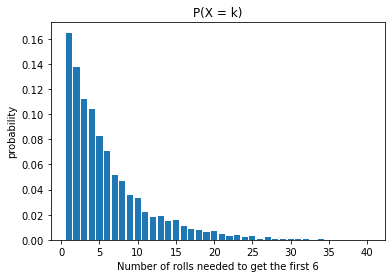

In [5]:
n = 5000 # simulations
k = 40 # rolls

first_6_roll = np.zeros(k)

for i in range(n):
    
    rolls = 0
    
    for j in range(k):
        
        roll = random.randint(1, 6)
        #print(roll, rolls)
        
        if roll == 6:
            first_6_roll[j] += 1
            break
        
        rolls += 1
        

prob_6 = np.round(first_6_roll/n, 3)

table = pd.DataFrame(columns = np.arange(1,41), index=['P(X=k)'])
table.loc['P(X=k)'] = prob_6
display(table)

plt.figure()
plt.bar(x = np.arange(1,41), height = table.loc['P(X=k)'])
plt.title('P(X = k)')
plt.xlabel('Number of rolls needed to get the first 6')
plt.ylabel('probability')
plt.show()